In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Importing pandas and  reading the dataset
import pandas as pd
df=pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking the shape of the data
df.shape

(891, 12)

In [4]:
#Checking the columns in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Checking if there are any missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that Column Age,Cabin and Embarked has missing values.So now our aim is first to handle missing values in the dataset

In [6]:
# Checking the median value of the Age columns
df.Age.median()

28.0

In [7]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df1=df.drop(['PassengerId','Name'],axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


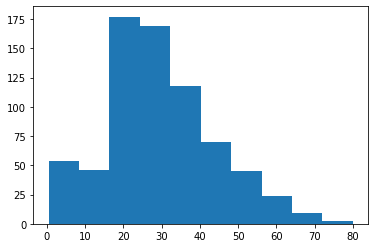

In [11]:
# Checking if the columns is Normally Distribution or not
from matplotlib import pyplot as plt
plt.hist(df['Age'])
plt.show()

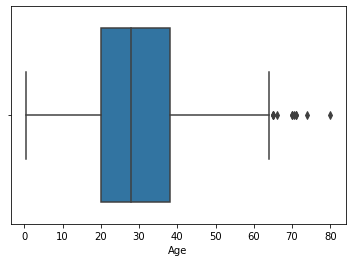

In [12]:
# Checking If the columns has some outliers
sns.boxplot(x=df['Age'])
plt.show()

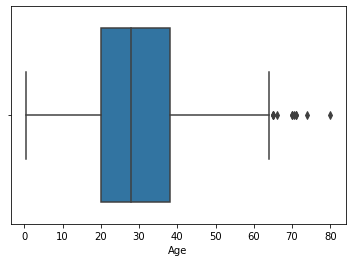

In [13]:
sns.boxplot(x=df1['Age'])

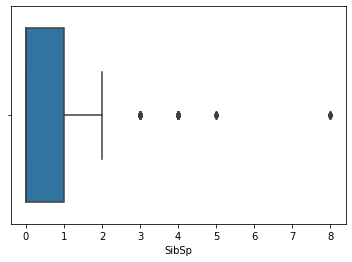

In [14]:
# Check the Feature SibSp with the boxplot if they are outliers or not
sns.boxplot(x=df1['SibSp'])
plt.show()

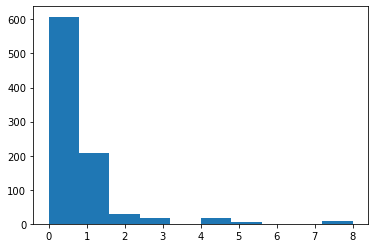

In [15]:
plt.hist(x=df['SibSp'])
plt.show()

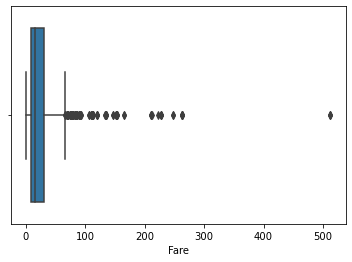

In [16]:
sns.boxplot(x=df['Fare'])

In [17]:
df1[df1.Fare>100].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,1,1,female,NaN,1,0,PC 17569,146.5208,B78,C
88,1,1,female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,0,1,male,24.0,0,1,PC 17558,247.5208,B58 B60,C
195,1,1,female,58.0,0,0,PC 17569,146.5208,B80,C


In [18]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

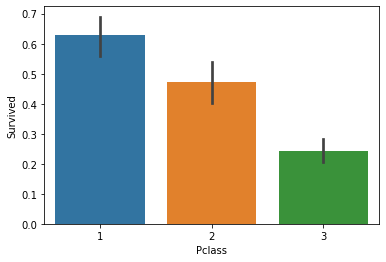

In [19]:
sns.barplot(x='Pclass',y='Survived',data=df1)

we can see that the 1st Class passengers has 70% chance of Survival which is obvious and  then 2 class and 3 class 
passengers

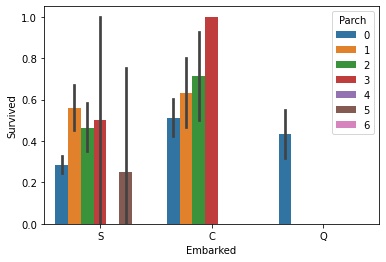

In [20]:
sns.barplot(x=df['Embarked'],y=df['Survived'],hue=df['Parch'])
plt.show()

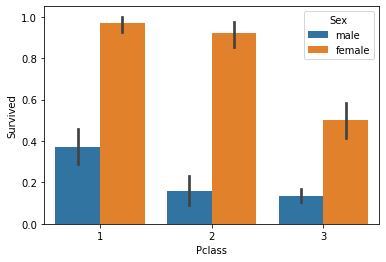

In [21]:
sns.barplot(x=df['Pclass'],y=df['Survived'],hue=df['Sex'])

Female has more chance of survival than the male 

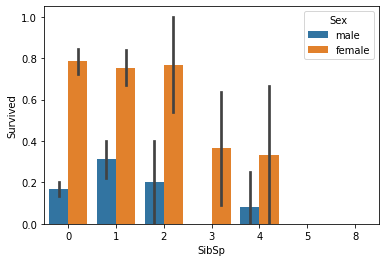

In [22]:
sns.barplot(x=df1['SibSp'],y=df1['Survived'],hue=df1['Sex'])

In [23]:
df1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [24]:
#How to Handle Missing Values
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [25]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
df1['Embarked'].isnull().sum()

2

In [27]:
df1.drop(['Cabin'],axis=1,inplace=True)

In [28]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [29]:
df1.drop(['Ticket'],axis=1,inplace=True)

In [30]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [31]:
df1['Age']=df1['Age'].fillna(df1.Age.median())

In [32]:
sex_encoding=pd.get_dummies(df1['Sex'],prefix='Sex_',drop_first=True)
sex_encoding

,Sex__male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [33]:
df2=pd.concat([df1,sex_encoding],axis=1)
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex__male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [34]:
embarked_encoding=pd.get_dummies(df2['Embarked'],prefix='Embarked_',drop_first=True)
embarked_encoding

,Embarked__Q,Embarked__S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [35]:
df3=pd.concat([df2,embarked_encoding],axis=1)
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex__male,Embarked__Q,Embarked__S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [36]:
df4=df3.drop(['Sex','Embarked'],axis=1)

In [37]:
df4.isnull().sum()

Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex__male      0
Embarked__Q    0
Embarked__S    0
dtype: int64

In [38]:
df4.head()
df4.shape

(891, 9)

In [39]:
df4.dtypes

Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex__male        uint8
Embarked__Q      uint8
Embarked__S      uint8
dtype: object

In [40]:
df4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked__Q,Embarked__S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [41]:
#Now we are performing Standardization using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df4)
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [ 1.2669898 , -1.56610693,  0.66386103, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 1.2669898 ,  0.82737724, -0.25833709, ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       [ 1.2669898 , -1.56610693, -0.25833709, ...,  0.73769513,
        -0.30756234, -1.61470971],
       [-0.78927234,  0.82737724,  0.20276197, ...,  0.73769513,
         3.25137334, -1.61470971]])

In [42]:
df5_scaled=pd.DataFrame(df_scaled)
df5_scaled

,0,1,2,3,4,5,6,7,8
0,-0.789272,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,1.266990,-1.566107,0.663861,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,1.266990,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,1.266990,-1.566107,0.433312,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,-0.789272,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.737695,-0.307562,0.619306
887,1.266990,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,-1.355574,-0.307562,0.619306
888,-0.789272,0.827377,-0.104637,0.432793,2.008933,-0.176263,-1.355574,-0.307562,0.619306
889,1.266990,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.737695,-0.307562,-1.614710


In [43]:
df4.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex__male',
       'Embarked__Q', 'Embarked__S'],
      dtype='object')

#Note that all the transformation will be done feature-wise

In [44]:
df5_scaled.rename(columns={0:'Survived',1:'Pclass',2:'Age',3:'SibSp',4:'Parch',5:'Fare',6:'Sex__male',
                  7:'Embarked__Q',8:'Embarked__S'},inplace=True)

In [45]:
df5_scaled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked__Q,Embarked__S
0,-0.789272,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,1.266990,-1.566107,0.663861,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,1.266990,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,1.266990,-1.566107,0.433312,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,-0.789272,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306


In [46]:
df_minmax.head()

NameError: name 'df_minmax' is not defined

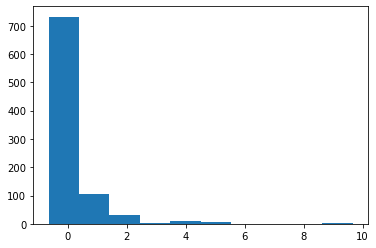

In [47]:
plt.hist(df5_scaled['Fare'])
plt.show()

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

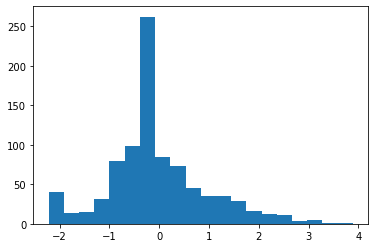

In [48]:
plt.hist(df5_scaled['Age'],bins=20)

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([-0.4745452 ,  0.25132565,  0.9771965 ,  1.70306735,  2.4289382 ,
         3.15480905,  3.8806799 ,  4.60655075,  5.3324216 ,  6.05829245,
         6.7841633 ]),
 <a list of 10 Patch objects>)

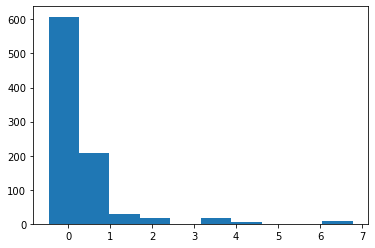

In [49]:
plt.hist(x=df5_scaled['SibSp'])

In [50]:
df4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked__Q,Embarked__S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [51]:
'''The MinMaxScaling scale down the value between 0 and 1'''
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df4))
df_minmax

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,0.0,1.0,0.346569,0.125,0.333333,0.045771,0.0,0.0,1.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


In [52]:
df4.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex__male',
       'Embarked__Q', 'Embarked__S'],
      dtype='object')

In [53]:
df_minmax.rename(columns={0:'Survived',1:'Pclass',2:'Age',3:'SibSp',4:'Parch',5:'Fare',6:'Sex__male',
       7:'Embarked__Q',8:'Embarked__S'},inplace=True)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

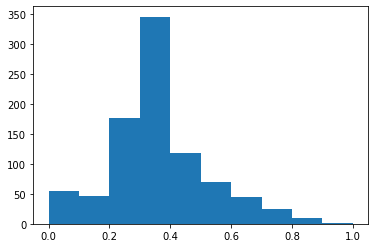

In [54]:
plt.hist(df_minmax['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

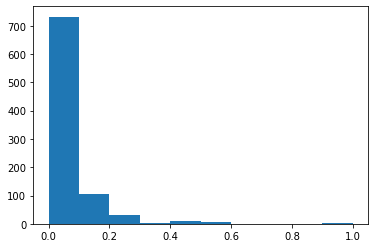

In [55]:
plt.hist(df_minmax['Fare'])

In [56]:
# Now we have seen that some columns are not normally distributed so we will use some transformation
#technique to make them normally distributed.
#If we want to check whether the feature is normally distributed then we use Q-Q plot
import scipy.stats as stat
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

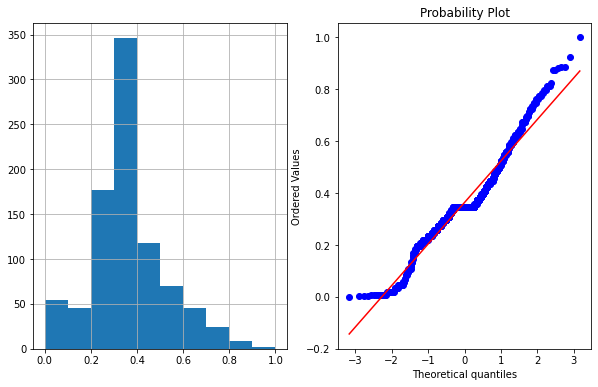

In [57]:
plot_data(df_minmax,'Age')

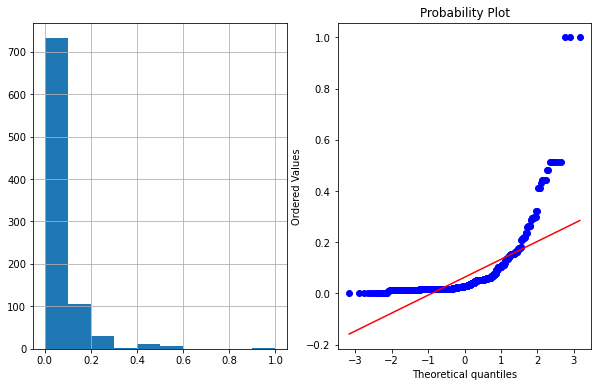

In [58]:
plot_data(df_minmax,'Fare')

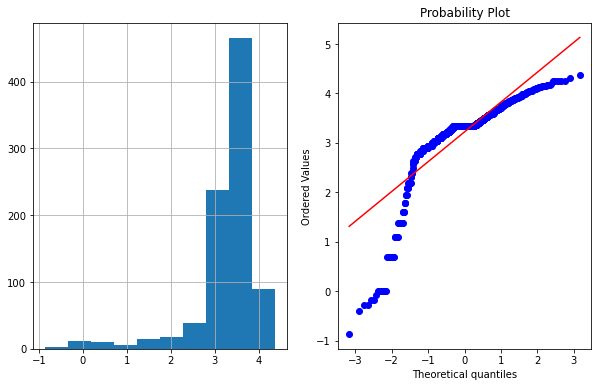

In [59]:
#There are Five Type of Transformation Technique:
# Square Transformation Log Transformation  Box-Cox Transformation  Exponential Transformation
df5=df4.copy()
df5['Age_log']=np.log(df5['Age'])
plot_data(df5,'Age_log')

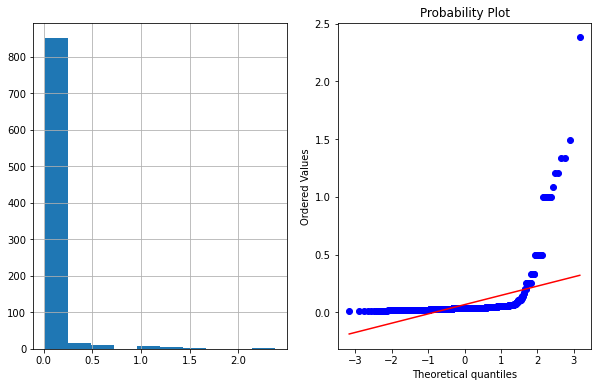

In [60]:
#Reciprocal Transformation
df5['Age_reciprocal']=1/df5.Age
plot_data(df5,'Age_reciprocal')

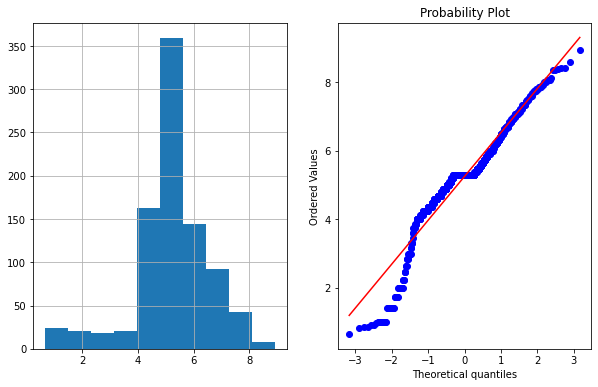

In [61]:
#Square-Root transformation
df5['Age_squareroot']=df5.Age**(1/2)
plot_data(df5,'Age_squareroot')

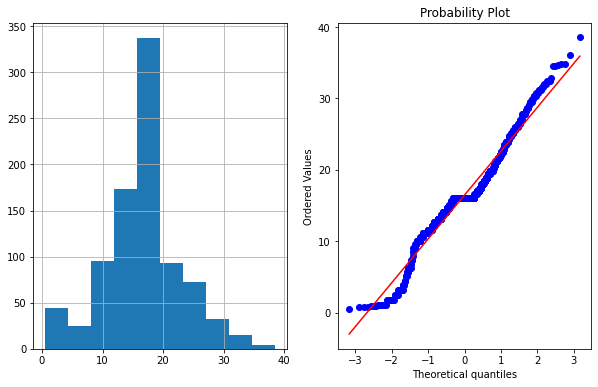

In [62]:
# Exponential Transformation
df5['Age_exponential']=df5.Age**(1/1.2)
plot_data(df5,'Age_exponential')

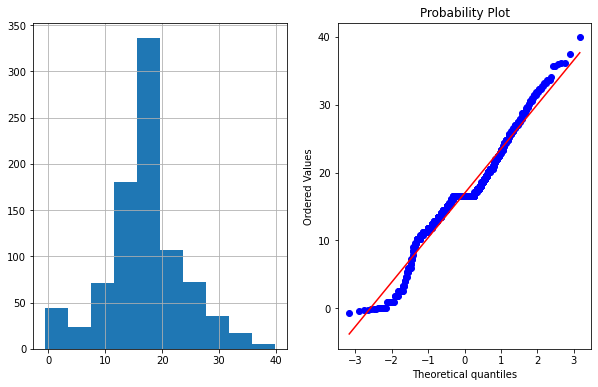

In [63]:
#BoxCox Transformation
df5['Age_boxcox'],parameters=stat.boxcox(df5.Age)
plot_data(df5,'Age_boxcox')

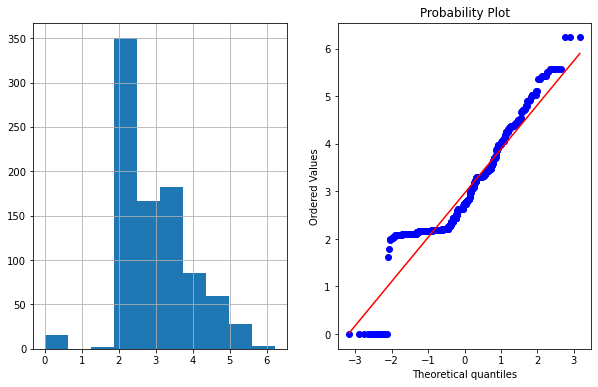

In [64]:
df5['Fare_log']=np.log1p(df5['Fare'])
plot_data(df5,'Fare_log')

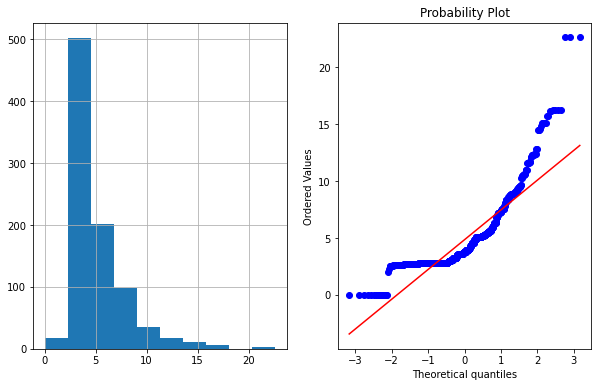

In [65]:
df5['Fare_squareroot']=df5.Fare**(1/2)
plot_data(df5,'Fare_squareroot')

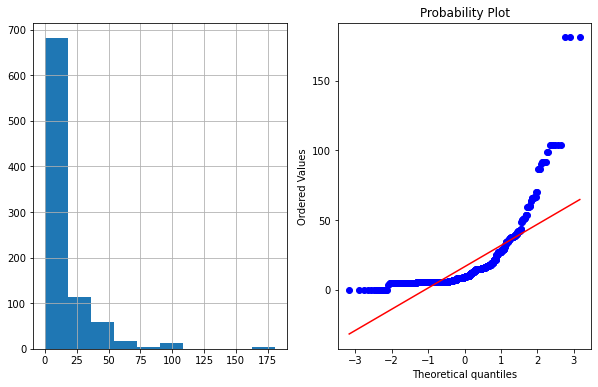

In [66]:
df5['Fare_exponential']=df5.Fare**(1/1.2)
plot_data(df5,'Fare_exponential')

In [67]:
df5_scaled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked__Q,Embarked__S
0,-0.789272,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,1.266990,-1.566107,0.663861,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,1.266990,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,1.266990,-1.566107,0.433312,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,-0.789272,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306


In [68]:
df4.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked__Q,Embarked__S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


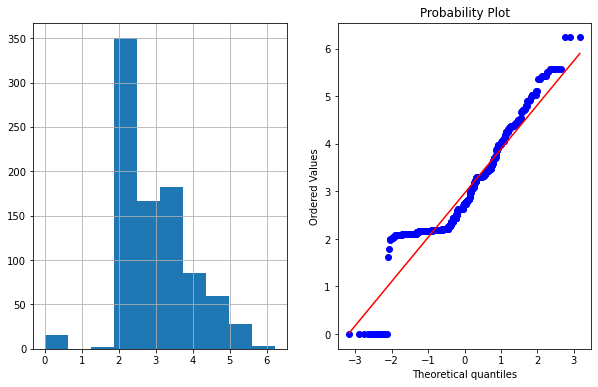

In [69]:
df4['Fare']=np.log1p(df4['Fare'])
plot_data(df4,'Fare')

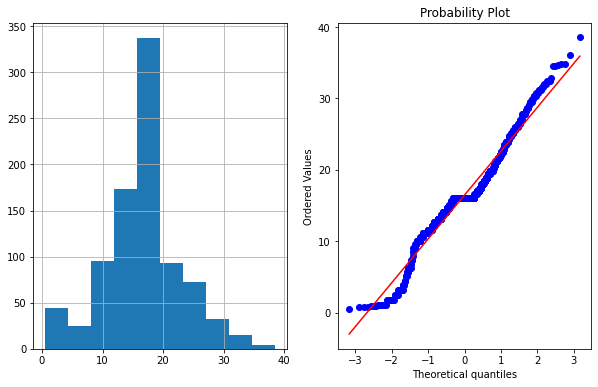

In [70]:
df4['Age']=df4.Age**(1/1.2)
plot_data(df4,'Age')

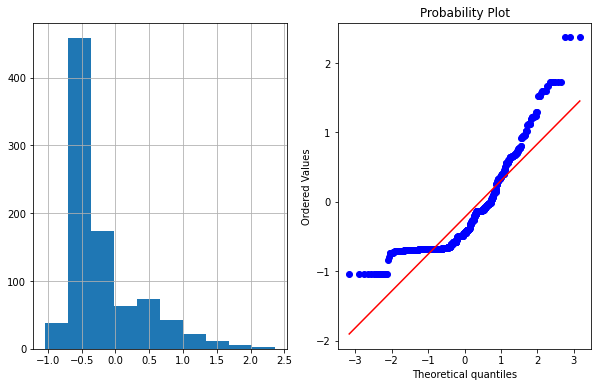

In [71]:
df5_scaled['Fare']=np.log1p(df5_scaled['Fare'])
plot_data(df5_scaled,'Fare')

In [72]:
df5_scaled.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked__Q,Embarked__S
0,-0.789272,0.827377,-0.565736,0.432793,-0.473674,-0.698050,0.737695,-0.307562,0.619306
1,1.266990,-1.566107,0.663861,0.432793,-0.473674,0.580452,-1.355574,-0.307562,-1.614710
2,1.266990,0.827377,-0.258337,-0.474545,-0.473674,-0.671101,-1.355574,-0.307562,0.619306
3,1.266990,-1.566107,0.433312,0.432793,-0.473674,0.351171,-1.355574,-0.307562,0.619306
4,-0.789272,0.827377,0.433312,-0.474545,-0.473674,-0.666189,0.737695,-0.307562,0.619306


In [73]:
df4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked__Q,Embarked__S
0,0,3,13.142729,1,0,2.110213,1,0,1
1,1,1,20.724608,1,0,4.280593,0,0,0
2,1,3,15.105825,0,0,2.188856,0,0,1
3,1,1,19.351889,1,0,3.990834,0,0,1
4,0,3,19.351889,0,0,2.202765,1,0,1


In [74]:
# Splitting the data into independent and dependent variables
X=df_minmax.drop(['Survived'],axis=1)
y=df_minmax.Survived

In [75]:
#Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print('The training data is:',X_train.shape,y_train.shape)
print('The testing data is:',X_test.shape,y_test.shape)

The training data is: (712, 8) (712,)
The testing data is: (179, 8) (179,)


In [76]:
#Now we have created the training data and testing data and we will move towards model creation
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [77]:
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.7821229050279329

# Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_pred,y_test)
print(confusion_matrix)

[[89 22]
 [17 51]]


# Compute precision, recall, F-measure and support

In [79]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       106
         1.0       0.75      0.70      0.72        73

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



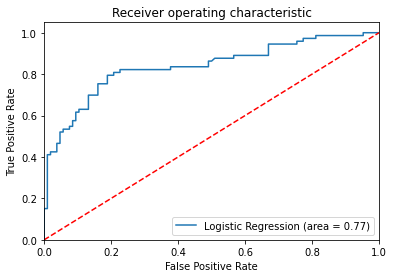

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()